In [2]:
from datasetup import flights
fnames = flights()

** Finished! **


In [4]:
import dask.dataframe as dd

In [8]:
ddf = dd.read_csv(fnames, dtype={'CRSElapsedTime': 'object','TailNum': 'object'})
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [10]:
import pandas as pd

In [20]:
%%time
ddf['UniqueCarrier'].unique().compute().tolist()

CPU times: user 9.03 s, sys: 358 ms, total: 9.39 s
Wall time: 4.4 s


['US', 'NW', 'TW', 'UA', 'CO', 'DL', 'HP', 'AA', 'PA (1)', 'EA', 'ML (1)']

In [21]:
%%time
carriers = []
for fname in fnames:
    df = pd.read_csv(fname, dtype={'CRSElapsedTime': 'object','TailNum': 'object'})
    carriers.extend(df.UniqueCarrier.unique().tolist())
print(list(set(carriers)))

['PA (1)', 'CO', 'EA', 'ML (1)', 'UA', 'TW', 'HP', 'AA', 'US', 'NW', 'DL']
CPU times: user 6.05 s, sys: 75.9 ms, total: 6.13 s
Wall time: 6.14 s


In [25]:
ser = ddf.groupby('Year')['DepDelay'].mean()

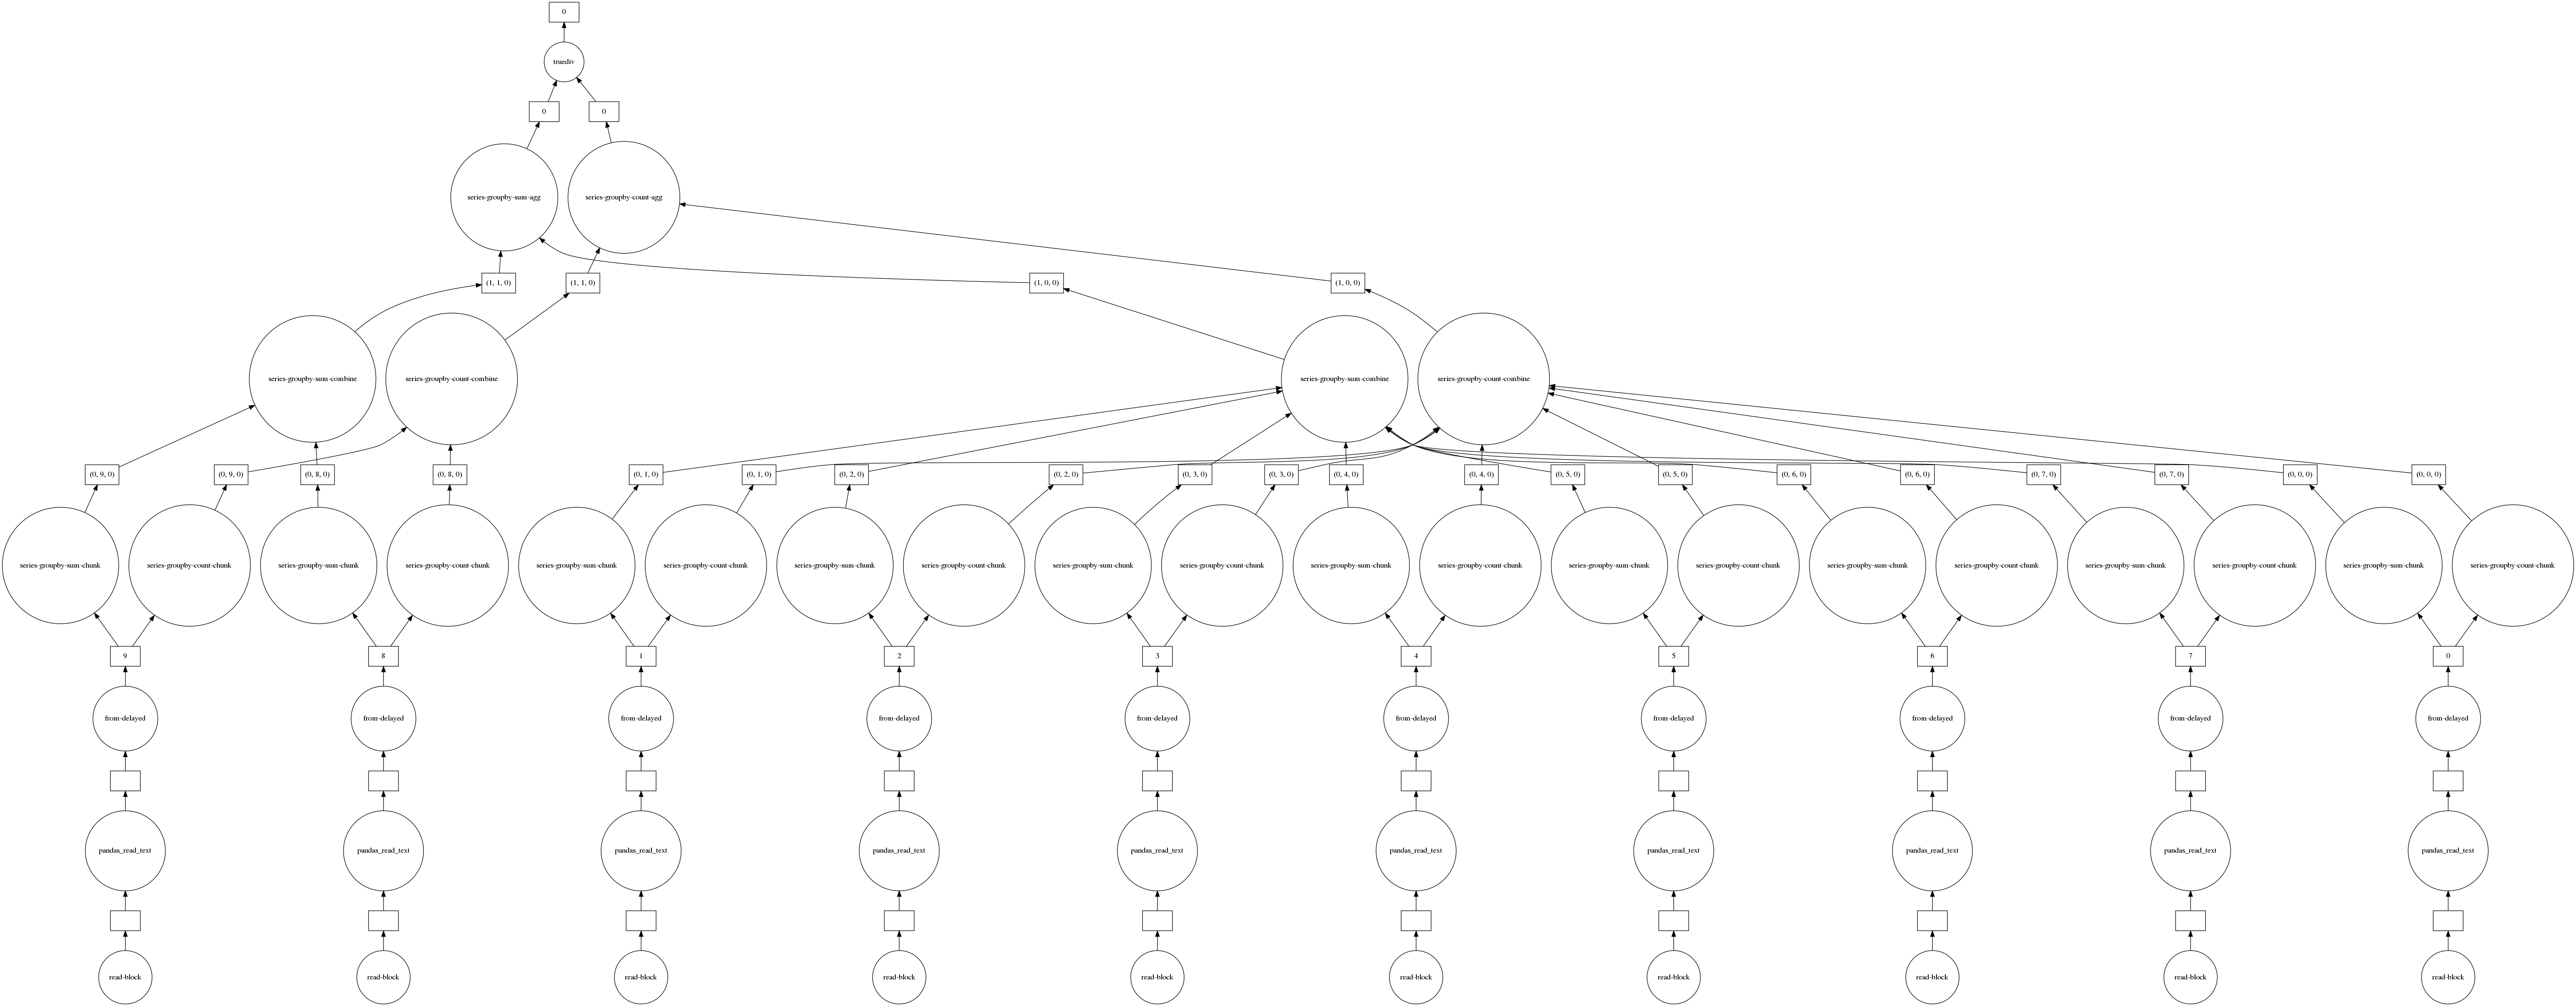

In [26]:
ser.visualize(filename='multi-csvs.svg')

In [27]:
%matplotlib notebook

<IPython.core.display.Javascript object>


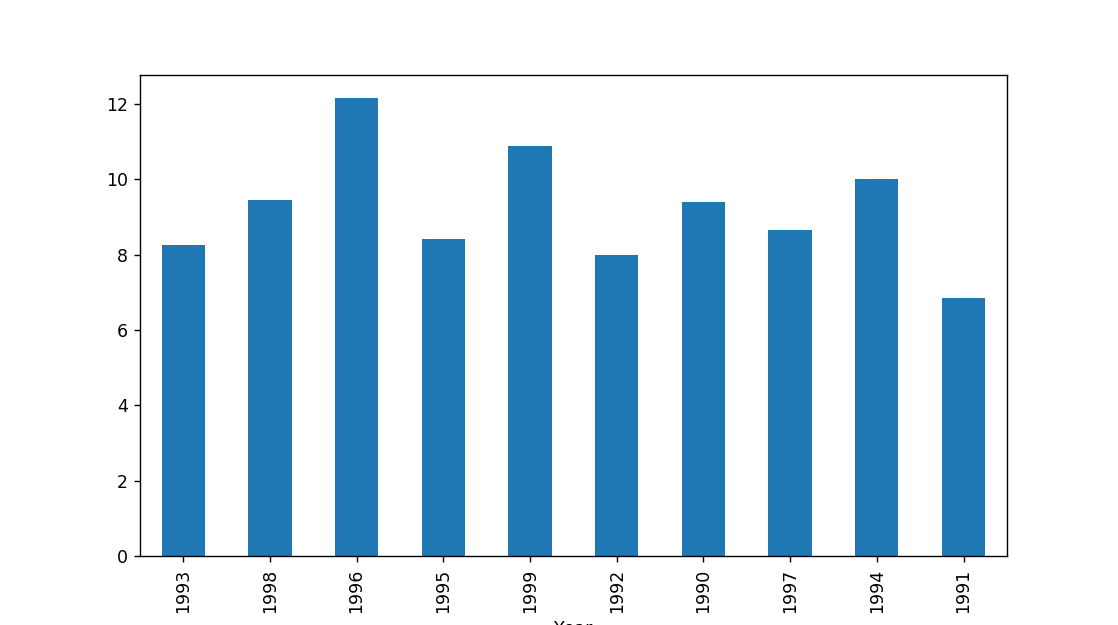

In [28]:
ser.compute().plot.bar()